# Imports des bibliothèques

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

import os

In [2]:
db_path = "/kaggle/input/olist-database/olist.db"

conn = sqlite3.connect(db_path)

In [3]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
display(tables)

,name
0,customers
1,geoloc
2,order_items
3,order_pymts
4,order_reviews
5,orders
6,products
7,sellers
8,translation


In [4]:
for table_name in tables['name']:
    print(f"Colonnes de la table: {table_name}")
    table_info = pd.read_sql_query(f"PRAGMA table_info({table_name});", conn)
    display(table_info)
    print("\n")

Colonnes de la table: customers


,cid,name,type,notnull,dflt_value,pk
0,0,index,BIGINT,0,None,0
1,1,customer_id,TEXT,0,None,0
2,2,customer_unique_id,TEXT,0,None,0
3,3,customer_zip_code_prefix,BIGINT,0,None,0
4,4,customer_city,TEXT,0,None,0
5,5,customer_state,TEXT,0,None,0




Colonnes de la table: geoloc


,cid,name,type,notnull,dflt_value,pk
0,0,index,BIGINT,0,None,0
1,1,geolocation_zip_code_prefix,BIGINT,0,None,0
2,2,geolocation_lat,FLOAT,0,None,0
3,3,geolocation_lng,FLOAT,0,None,0
4,4,geolocation_city,TEXT,0,None,0
5,5,geolocation_state,TEXT,0,None,0




Colonnes de la table: order_items


,cid,name,type,notnull,dflt_value,pk
0,0,index,BIGINT,0,None,0
1,1,order_id,TEXT,0,None,0
2,2,order_item_id,BIGINT,0,None,0
3,3,product_id,TEXT,0,None,0
4,4,seller_id,TEXT,0,None,0
5,5,shipping_limit_date,TEXT,0,None,0
6,6,price,FLOAT,0,None,0
7,7,freight_value,FLOAT,0,None,0




Colonnes de la table: order_pymts


,cid,name,type,notnull,dflt_value,pk
0,0,index,BIGINT,0,None,0
1,1,order_id,TEXT,0,None,0
2,2,payment_sequential,BIGINT,0,None,0
3,3,payment_type,TEXT,0,None,0
4,4,payment_installments,BIGINT,0,None,0
5,5,payment_value,FLOAT,0,None,0




Colonnes de la table: order_reviews


,cid,name,type,notnull,dflt_value,pk
0,0,index,BIGINT,0,None,0
1,1,review_id,TEXT,0,None,0
2,2,order_id,TEXT,0,None,0
3,3,review_score,BIGINT,0,None,0
4,4,review_comment_title,TEXT,0,None,0
5,5,review_comment_message,TEXT,0,None,0
6,6,review_creation_date,TEXT,0,None,0
7,7,review_answer_timestamp,TEXT,0,None,0




Colonnes de la table: orders


,cid,name,type,notnull,dflt_value,pk
0,0,index,BIGINT,0,None,0
1,1,order_id,TEXT,0,None,0
2,2,customer_id,TEXT,0,None,0
3,3,order_status,TEXT,0,None,0
4,4,order_purchase_timestamp,TEXT,0,None,0
5,5,order_approved_at,TEXT,0,None,0
6,6,order_delivered_carrier_date,TEXT,0,None,0
7,7,order_delivered_customer_date,TEXT,0,None,0
8,8,order_estimated_delivery_date,TEXT,0,None,0




Colonnes de la table: products


,cid,name,type,notnull,dflt_value,pk
0,0,index,BIGINT,0,None,0
1,1,product_id,TEXT,0,None,0
2,2,product_category_name,TEXT,0,None,0
3,3,product_name_lenght,FLOAT,0,None,0
4,4,product_description_lenght,FLOAT,0,None,0
5,5,product_photos_qty,FLOAT,0,None,0
6,6,product_weight_g,FLOAT,0,None,0
7,7,product_length_cm,FLOAT,0,None,0
8,8,product_height_cm,FLOAT,0,None,0
9,9,product_width_cm,FLOAT,0,None,0




Colonnes de la table: sellers


,cid,name,type,notnull,dflt_value,pk
0,0,index,BIGINT,0,None,0
1,1,seller_id,TEXT,0,None,0
2,2,seller_zip_code_prefix,BIGINT,0,None,0
3,3,seller_city,TEXT,0,None,0
4,4,seller_state,TEXT,0,None,0




Colonnes de la table: translation


,cid,name,type,notnull,dflt_value,pk
0,0,index,BIGINT,0,None,0
1,1,product_category_name,TEXT,0,None,0
2,2,product_category_name_english,TEXT,0,None,0


In [5]:
query = "SELECT * FROM sellers;"
orders_df = pd.read_sql_query(query, conn)

display(orders_df)

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...,...
3090,3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [6]:
query = "SELECT * FROM customers;"
orders_df = pd.read_sql_query(query, conn)

display(orders_df)

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...
99436,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


# Requêtes RFM

In [7]:
rfm_query = """
WITH last_order_date AS (
    SELECT MAX(order_purchase_timestamp) AS max_order_date FROM orders
),
rfm_features AS (
    SELECT
        c.customer_unique_id,
        CAST(
            (JULIANDAY((SELECT max_order_date FROM last_order_date)) - JULIANDAY(MAX(o.order_purchase_timestamp)))
            AS INTEGER
        ) AS recency,
        COUNT(DISTINCT o.order_id) AS frequency,
        SUM(oi.price + oi.freight_value) AS monetary
    FROM customers c
    LEFT JOIN orders o ON c.customer_id = o.customer_id
    LEFT JOIN order_items oi ON o.order_id = oi.order_id
    GROUP BY c.customer_unique_id
)
SELECT * FROM rfm_features;
"""

rfm_data = pd.read_sql_query(rfm_query, conn)
print("\nAperçu des données RFM :")
display(rfm_data.head())


Aperçu des données RFM :


,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


In [8]:
review_score_query = """
WITH review_scores AS (
    SELECT 
        o.customer_id,
        AVG(r.review_score) AS avg_review_score
    FROM orders o
    LEFT JOIN order_reviews r ON o.order_id = r.order_id
    GROUP BY o.customer_id
)
SELECT c.customer_unique_id, rs.avg_review_score
FROM customers c
LEFT JOIN review_scores rs ON c.customer_id = rs.customer_id;
"""

review_data = pd.read_sql_query(review_score_query, conn)
print("\nAperçu des scores moyens des reviews :")
display(review_data.head())

total_items_query = """
WITH total_items AS (
    SELECT
        c.customer_unique_id,
        SUM(oi.order_item_id) AS total_items
    FROM customers c
    LEFT JOIN orders o ON c.customer_id = o.customer_id
    LEFT JOIN order_items oi ON o.order_id = oi.order_id
    GROUP BY c.customer_unique_id
)
SELECT * FROM total_items;
"""

items_data = pd.read_sql_query(total_items_query, conn)
print("\nAperçu des articles totaux par client :")
display(items_data.head())


Aperçu des scores moyens des reviews :


,customer_unique_id,avg_review_score
0,861eff4711a542e4b93843c6dd7febb0,4.0
1,290c77bc529b7ac935b93aa66c333dc3,5.0
2,060e732b5b29e8181a18229c7b0b2b5e,5.0
3,259dac757896d24d7702b9acbbff3f3c,5.0
4,345ecd01c38d18a9036ed96c73b8d066,5.0



Aperçu des articles totaux par client :


,customer_unique_id,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0
2,0000f46a3911fa3c0805444483337064,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1.0
4,0004aac84e0df4da2b147fca70cf8255,1.0


In [9]:
customer_features = rfm_data.merge(review_data, on="customer_unique_id", how="left")
customer_features = customer_features.merge(items_data, on="customer_unique_id", how="left")

print("\nAperçu du fichier final par client :")
display(customer_features.head())


Aperçu du fichier final par client :


,customer_unique_id,recency,frequency,monetary,avg_review_score,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,5.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4.0,1.0
2,0000f46a3911fa3c0805444483337064,585,1,86.22,3.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,4.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,5.0,1.0


In [10]:
customer_features.isnull().sum()

customer_unique_id      0
recency                 0
frequency               0
monetary              685
avg_review_score      768
total_items           685
dtype: int64

In [11]:
conn = sqlite3.connect("/kaggle/input/olist-database/olist.db")  # Remplacez par le chemin vers votre fichier .db

query_avg_score = "SELECT AVG(review_score) AS avg_global_score FROM order_reviews WHERE review_score IS NOT NULL"

customer_features[['monetary', 'total_items']] = customer_features[['monetary', 'total_items']].fillna(0)
avg_global_score = conn.execute(query_avg_score).fetchone()[0]

customer_features['avg_review_score'].fillna(avg_global_score, inplace=True)

conn.close()

In [12]:
customer_features.isnull().sum()

customer_unique_id    0
recency               0
frequency             0
monetary              0
avg_review_score      0
total_items           0
dtype: int64

In [13]:
import pandas as pd

# Connexion à la base de données
conn = sqlite3.connect("/kaggle/input/olist-database/olist.db")  # Remplacez par le chemin de votre fichier .db

# Requête pour récupérer les commandes du client spécifié
query = """
SELECT *
FROM orders
JOIN customers ON orders.customer_id = customers.customer_id
WHERE customers.customer_unique_id = '025cf7c2f32536f0be1ab412bb6602d2';
"""

# Exécuter la requête et charger les résultats dans un DataFrame pandas
customer_orders = pd.read_sql_query(query, conn)

# Afficher les résultats
display(customer_orders)

# Fermer la connexion
conn.close()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,17481,a46e7e8e02915adecb392ad065121a51,0ef4273145d74465c180b6a9fbb9799b,delivered,2018-08-17 10:59:18,2018-08-18 10:50:41,2018-08-24 14:21:00,2018-08-29 20:03:26,2018-09-27 00:00:00,61076,0ef4273145d74465c180b6a9fbb9799b,025cf7c2f32536f0be1ab412bb6602d2,88845,cocal do sul,SC


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


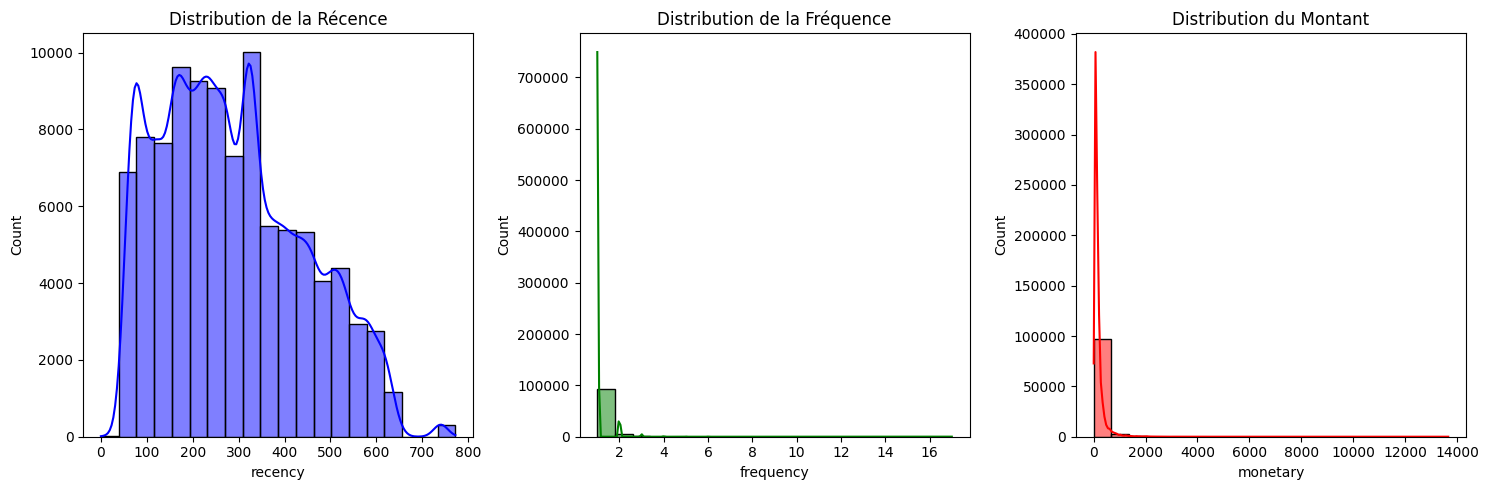

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(customer_features["recency"], bins=20, kde=True, color="blue")
plt.title("Distribution de la Récence")

plt.subplot(1, 3, 2)
sns.histplot(customer_features["frequency"], bins=20, kde=True, color="green")
plt.title("Distribution de la Fréquence")

plt.subplot(1, 3, 3)
sns.histplot(customer_features["monetary"], bins=20, kde=True, color="red")
plt.title("Distribution du Montant")

plt.tight_layout()
plt.show()


In [15]:
customer_features.describe()

,recency,frequency,monetary,avg_review_score,total_items
count,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000
mean,286.945586,1.079223,170.650658,4.086791,1.482095
std,153.240436,0.396154,235.775976,1.341065,2.567892
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,163.000000,1.000000,63.370000,4.000000,1.000000
50%,268.000000,1.000000,110.200000,5.000000,1.000000
75%,396.000000,1.000000,188.650000,5.000000,1.000000
max,772.000000,17.000000,13664.080000,5.000000,231.000000


In [16]:
output_path = "customers_features.csv"
customer_features.to_csv(output_path, index=False)
print(f"\nFichier par client exporté avec succès : {output_path}")

conn.close()


Fichier par client exporté avec succès : customers_features.csv
